In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
image = cv2.imread('../images/Village.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


fig = plt.figure(figsize=(20, 10))
plt.imshow(image)

plt.show()

In [3]:
pixel_values = image.reshape((-1,3))

pixel_values = np.float32(pixel_values)
print(pixel_values.shape)

(1091840, 3)


# cv2.kmeans()

**Parameters:**
1. samples : It should be of np.float32 data type, and each feature should be put in a single column.
2. nclusters(K) : Number of clusters required at end
3. criteria : It is the iteration termination criteria. When this criteria is satisfied, algorithm iteration stops. Actually, it should be a tuple of 3 parameters. They are `( type, max_iter, epsilon )`:
    1. type of termination criteria. It has 3 flags as below:
        1. cv.TERM_CRITERIA_EPS - stop the algorithm iteration if specified accuracy, epsilon, is reached.
        1. cv.TERM_CRITERIA_MAX_ITER - stop the algorithm after the specified number of iterations, max_iter.
        1. cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER - stop the iteration when any of the above condition is met.
    2. max_iter - An integer specifying maximum number of iterations.
    3. epsilon - Required accuracy
4. attempts : Flag to specify the number of times the algorithm is executed using different initial labellings. The algorithm returns the labels that yield the best compactness. This compactness is returned as output.
5. flags : This flag is used to specify how initial centers are taken. Normally two flags are used for this : cv.KMEANS_PP_CENTERS and cv.KMEANS_RANDOM_CENTERS.

**Output parameters**
1. compactness : It is the sum of squared distance from each point to their corresponding centers.
2. labels : This is the label array where each element marked '0', '1'.....
3. centers : This is array of centers of clusters.


In [4]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

k =20
retval, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [5]:
print(retval)
print(labels.shape)
print(labels[:10])
print(centers.shape)

708956718.7471064
(1091840, 1)
[[18]
 [18]
 [18]
 [18]
 [18]
 [12]
 [12]
 [12]
 [12]
 [12]]
(20, 3)


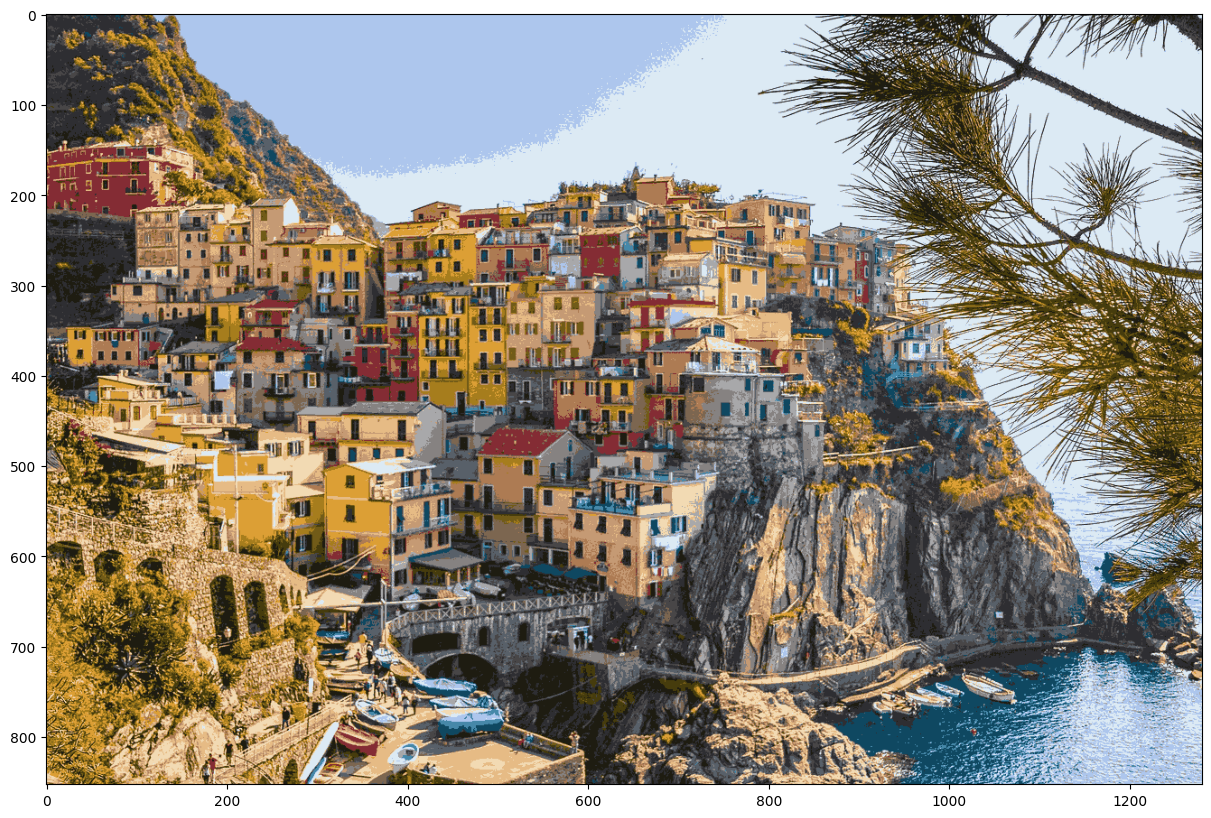

In [6]:
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
segmented_image = segmented_data.reshape((image.shape))

fig = plt.figure(figsize=(20, 10))
plt.imshow(segmented_image)